<table>
    <tr>
        <td>
            <h1>Clustering sur les joueurs de Fifa 21</h1>
        </td>
    </tr>
</table>

<center><i>Réalisé par : </i>Douba JAFUNO </center>

<table>
    <tr style="text-align: center;vertical-align:middle">
    <td style="border-top: 1px solid black; border-bottom: 1px solid black;vertical-align: middle">     
 <h1>Plan</h1>
    </td>
   </tr>
</table>
 
<table style="width: 100%">
<tr>
    <td style="width: 15%">
    </td>
    <td style="width: 70%; text-align:left">
        <a href="#1"><h1>I. Introduction</h1></a><br>
           &emsp; <a href="#presentation">I.1 Présentation du problème</a><br>
           &emsp; <a href="#visualisation">I.2 Préparation du problème et Visualisation des données</a><br><br>

<a href="#2"><h1>II. Kmeans</h1></a><br><br>
    &nbsp; <a href="#pre1">II.1 Présentation</a><br>
    &nbsp; <a href="#nc">II.2 Nombres de clusters</a><br>
    &emsp; <a href="#mc">II.2.1 Méthode du coude</a><br>
    &emsp; <a href="#sil">II.2.2 Silhouette</a><br>
    &nbsp; <a href="#cak">II.3 Clustering avec Kmeans</a><br>
  

<a href="#3"><h1>III. Mélanges Gaussien</h1></a><br><br>
    &nbsp; <a href="#pre2">III.1 Présentation</a><br>
    &nbsp; <a href="#cab">III.2 Critère AIC et BIC</a><br>
    &nbsp; <a href="#cmg">III.3 Clustering avec les Mélanges Gaussiens</a><br>

<a href="#4"><h1>IV. Classification Hiérarchique</h1></a><br><br>
    &nbsp; <a href="#pre3">IV.1 Présentation</a><br>
    &nbsp; <a href="#den">IV.2 Dendogramme</a><br>
  
<a href="#5"><h1>V. ACP</h1></a><br><br>
    &nbsp; <a href="#pre4">V.1 Présentation</a><br>
    &nbsp; <a href="#amuce">V.2 Appliquer les modèles en utilisant les caractéristiques extraites de l'ACP</a><br>
  

<a href="#6"><h1>VI. Conclusion </h1></a><br><br>
    &emsp; <a href="#ref">VI.1 Références</a><br>
   </td>
    <td style="width: 0%">
    </td>
</tr>
</table>


# <a name="1">Introduction</a>

## <a name="presentation"> Présentation du problème </a>

Cette étude se base sur le jeu de donnée [FIFA 21 COMPLETE PLAYER DATASET](https://www.kaggle.com/ekrembayar/fifa-21-complete-player-dataset) issue de Kaggle. 

Il est bien connu que les simulations de foot sucite l'interret de nombreux gamers et des amateurs de football, chaque année au fil des années le jeux vidéo de football Fifa s'est imposé comme une référence mondiale en termes de vente notamment.

Dans cette étude on s'intérressera au jeux vidéo FIFA 21 développé par EA Canada et EA Roumanie et édité par EA Sports. Notre but sera de segmenter les joueurs du Jeu de donnée en groupes de talents en utilisant des **algorithmes de clustering**, et nous tenterons ici de proposer différentes approches d'**apprentissages statistiques non supervisées** afin de classées nos joueurs, nous utiliserons notamment l'**ACP (Analyse en Composante Principal)** afin de réduire la dimension des caractériques de nos joueurs notamment pour une meilleure visualisation de nos clusters.

Contenu: 

Notre jeu de données contient l'ensemble des caractéristiques des hommes footballeurs professionnel, on pourra retrouver des variables quantitatives et qualitatives. Certaine caractériqtiques sont seulement des carictéristiques footbalistiques ou sportives comme par exemple la vitesse, la puuissance de tir, ou bien la défense ces variables par exemple sont représenté par un entier, plus cet entier est grand plus la caractéristique pour le joueur est importante, d'autre variable comme l'age par exemple ne sont pas d'ordre footballistique. Un exemple de variable qualitative peut etre le nom du joueur ou bien sa position (son poste) sur le terrain.





In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import *

import time
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture

from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse 

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix as sm

## <a name="visualisation"> Préparation du problème et Visualisation des données </a>



Importons les données csv.

In [2]:
fifa= pd.read_csv('Données/fifa21_male2.csv', sep=',')

C:\Users\jafun\Anaconda3\envs\Projet\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
fifa.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


Regardons la dimensions de notre jeu de données

In [4]:
fifa.shape

(17125, 107)

In [5]:
print(fifa.describe())

                  ID           Age           OVA           BOV           POT  \
count   17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean   219388.716204     25.272934     66.965022     67.900204     72.489810   
std     37499.197507      4.942665      6.864329      6.637538      5.769949   
min         2.000000     16.000000     38.000000     42.000000     47.000000   
25%    204082.000000     21.000000     62.000000     64.000000     69.000000   
50%    228961.000000     25.000000     67.000000     68.000000     72.000000   
75%    243911.000000     29.000000     72.000000     72.000000     76.000000   
max    259105.000000     53.000000     93.000000     93.000000     95.000000   

             Growth     Attacking      Crossing     Finishing  \
count  17125.000000  17125.000000  17125.000000  17125.000000   
mean       5.524788    258.537752     51.621314     47.956672   
std        5.787539     72.255687     17.875715     19.391547   
min       -1.000000

Regardons nos cracactéristiques numériques ainsi que le nombres de valeurs manquantes pour chacunes.

In [6]:
fifa_numerics_only = fifa.select_dtypes(include=np.number)
fifa_numerics_only.isnull().sum()

ID                    0
Age                   0
OVA                   0
BOV                   0
POT                   0
Growth                0
Attacking             0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys              58
Skill                 0
Dribbling             0
Curve                58
FK Accuracy           0
Long Passing          0
Ball Control          0
Movement              0
Acceleration          0
Sprint Speed          0
Agility              58
Reactions             0
Balance              58
Power                 0
Shot Power            0
Jumping              58
Stamina               0
Strength              0
Long Shots            0
Mentality             0
Aggression            0
Interceptions         7
Positioning           7
Vision               58
Penalties             0
Composure           423
Defending             0
Marking               0
Standing Tackle       0
Sliding Tackle       58
Goalkeeping     

Dans le jeu Fifa 21 certaine caractéristique principalement sportive nous permettent d'évaluer le niveau d'un joueur pour cela chaque joueur possède sa carte de performance avec ses principales caractéristiques utile pour son poste sur le terrain comme on peut le voir dans l'image ci-dessous:


![Dossier.](https://img.gaming.gentside.com/article/480/gallery/10-sadio-mane-90_21f360e5b31addfb9f3b8e694d4bed3da4a7d354.jpg)

Le joueur Mané a une note globale (OVA) de 90 il joue à la position d'ailier gauche (LW) est de nationalité Sénégalaise et évolue au sein du club de Liverpool, ses notes principales en tant qu'ailier gauche sont :
- 94 en vitesse (PAC)
- 85 en tir (SHO)
- 80 en passe (PAS)
- 90 en drible (DRI)
- 44 en défense (DEF)
- 76 en physique (PHY)

Affichons ces caractéristiques.

In [7]:
Mane= fifa[fifa['Name']=='S. Mané']

In [8]:
Mane[['Name','OVA','Position','Nationality','Club','PAC','SHO','PAS','DRI','DEF','PHY','Attacking','POT']]

,Name,OVA,Position,Nationality,Club,PAC,SHO,PAS,DRI,DEF,PHY,Attacking,POT
5030,S. Mané,90,LW,Senegal,Liverpool,94,85,80,90,44,76,410,90


Dans un premier temps j'ai fais le choix de sélectionner toute les carractéristiques numériques présente sur la carte de Sadio Mané ie **'PAC','SHO','PAS','DRI','DEF' et 'PHY'** de plus en regardant nos valeurs manquante ici, nous voyons que ces variables n'en n'ont pas, il en est de meme pour deux autres variables que j'ai choisis **POT** et **Attacking**.

- La variable **POT** concerne la note sur 100 du potentiel d'un jour spécifiquement à son poste sur le terrain cette note est parfois proche de la note globale d'un joueurs 

- La variable **Attacking** correspond à la note globale sur les capacité offensives du joueurs il s'agit en particulier de la somme des variables **Crossing, Finishing, Heading Accuracy, Short Passing, Volleys** bien que la variable Volleys contienne des valeurs manquante qui ne seront pas prises dans le calculs de la variable **Attacking**.

In [9]:
fifa=fifa[['Name', 'OVA','PAC','SHO','PAS','DRI','DEF','PHY','POT','Attacking']]
fifa.head()

,Name,OVA,PAC,SHO,PAS,DRI,DEF,PHY,POT,Attacking
0,G. Pasquale,69,71,59,70,71,68,69,69,313
1,Luis García,71,53,69,73,69,58,63,71,337
2,J. Cole,71,45,68,76,77,36,52,71,337
3,D. Yorke,68,61,66,66,69,47,60,82,264
4,Iniesta,81,58,70,85,85,63,59,81,367


Nous prendrons également en compte seulement les joueurs dont la note globale est supérieur à 84.

In [10]:
fifa = fifa[fifa.OVA> 84] # extraire les joueurs dont la note global est supérieur à 84

In [11]:
fifa.shape

(109, 10)

Finalement on prendra compte 109 joueurs ainsi que nos 9 variables quantitative.
Description des données:

In [12]:
fifa.describe()

,OVA,PAC,SHO,PAS,DRI,DEF,PHY,POT,Attacking
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,86.743119,77.834862,74.834862,78.339450,82.449541,61.174312,75.348624,87.972477,326.073394
std,1.877763,10.868331,13.613388,8.292366,7.965767,19.041788,9.551397,2.428453,103.178442
min,85.000000,42.000000,28.000000,54.000000,60.000000,32.000000,44.000000,85.000000,78.000000
25%,85.000000,71.000000,66.000000,75.000000,78.000000,45.000000,68.000000,86.000000,311.000000
50%,86.000000,80.000000,81.000000,80.000000,85.000000,57.000000,78.000000,87.000000,364.000000
75%,88.000000,86.000000,85.000000,84.000000,89.000000,81.000000,82.000000,90.000000,392.000000
max,93.000000,96.000000,93.000000,93.000000,95.000000,91.000000,92.000000,95.000000,437.000000


In [13]:
names=fifa['Name'].values

In [14]:
names

array(['O. Kahn', 'Xavi', 'Cristiano Ronaldo', 'P. Lahm', 'G. Chiellini',
       'A. Gómez', 'Piqué', 'S. Agüero', 'Sergio Ramos', 'L. Messi',
       'S. Handanovič', 'Filipe Luís', 'Thiago Silva', 'K. Benzema',
       'M. Neuer', 'H. Lloris', 'David Silva', 'D. Mertens', 'L. Suárez',
       'L. Modrić', 'H. de Noteboom', 'J. Maatje', 'B. Ronhaar',
       'M. Benatia', 'Y. Sommer', 'M. Hummels', 'E. Cavani', 'M. Pjanić',
       'G. Wijnaldum', 'D. Godín', 'T. Kroos', 'E. Hazard',
       'J. Henderson', 'A. Di María', 'T. Alderweireld', 'Y. Brahimi',
       'L. Bonucci', 'P. Gulácsi', 'W. Szczęsny', 'M. Reus', 'K. Walker',
       'R. Lewandowski', 'P. Aubameyang', 'Jordi Alba', 'Thiago',
       'Sergio Busquets', 'Parejo', 'T. Müller', 'C. Eriksen',
       'Neymar Jr', 'Alex Sandro', 'T. Courtois', 'C. Immobile',
       'M. ter Stegen', 'R. Lukaku', 'B. Leno', 'K. De Bruyne',
       'K. Navas', 'De Gea', 'Koke', 'A. Griezmann', 'P. Pogba',
       'L. Insigne', 'Luis Alberto', 'M. Verrat

Le tableau ci-dessus nous montre bien qu'il y a 109 joueurs et nos 8 variables et que pour chaque attribut, la distribution diffère beaucoup. Nous allons maintenant tracer le diagramme de dispersion des variables de l'ensemble de données comme suit :

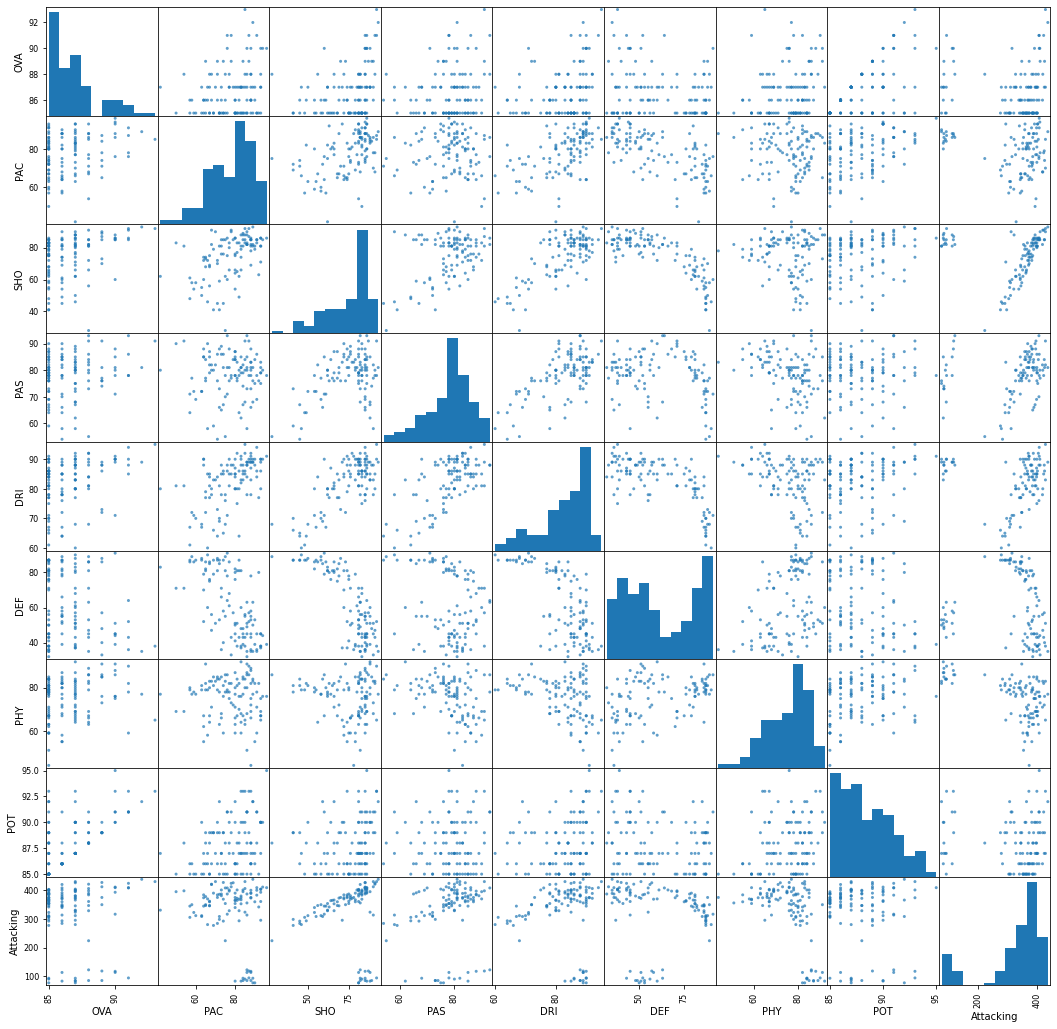

In [15]:
sm(fifa, alpha = 0.7, figsize = (18,18))
plt.show()

On voit que d'après les nuages de points, chacune des distributions de nos variables ne semble pas symétrique et donc normale, il nous est difficile de regrouper les données.  Contrairement aux autres variables la variable **Attacking** prend de plus grandes valeurs de 100 à 400.Regardons les corrélations. 

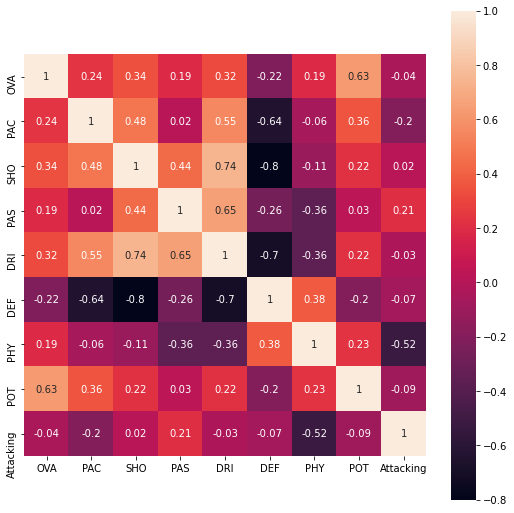

In [16]:
correlation = fifa.corr()

# Correlation Heatmap

plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2), 
            annot = True, 
            vmax = 1, 
            square = True)
plt.show()


D'après la carte thermique ci-dessus, nous pouvons conclure que les corrélations entre

"Dri" et "Shot" (0,74) ;
"POT" et "OVA (0,63) ;
sont les plus importantes.

Avant d'entammer la prochaine partie supprimons la colonne **Name**.

In [17]:
fifa = fifa.drop(labels = 'Name',axis =1)
fifa = fifa.fillna(fifa.mean())

In [18]:
fifa

,OVA,PAC,SHO,PAS,DRI,DEF,PHY,POT,Attacking
14,87,83,88,62,83,60,92,90,84
104,86,66,72,90,85,60,58,86,369
142,92,89,93,81,89,35,77,92,437
366,88,67,56,82,84,86,64,88,346
458,87,66,46,58,60,90,79,87,280
...,...,...,...,...,...,...,...,...,...
9351,85,65,68,77,77,82,79,88,346
9462,85,69,41,59,66,87,81,89,277
9633,87,83,74,81,91,37,64,93,373
10212,85,72,59,66,69,85,84,92,308


Maintenant nous allons normaliser les données.

Appliquons la technique de rééchelonnement pour maintenir toutes les valeurs des variables d'entrée dans la plage de 0 à 1 en utilisant MinMaxScaler

In [19]:
from sklearn import preprocessing
x = fifa.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
fifanorm = pd.DataFrame(x_scaled, columns = fifa.columns)
fifanorm.head()

,OVA,PAC,SHO,PAS,DRI,DEF,PHY,POT,Attacking
0,0.250,0.759259,0.923077,0.205128,0.657143,0.474576,1.000000,0.5,0.016713
1,0.125,0.444444,0.676923,0.923077,0.714286,0.474576,0.291667,0.1,0.810585
2,0.875,0.870370,1.000000,0.692308,0.828571,0.050847,0.687500,0.7,1.000000
3,0.375,0.462963,0.430769,0.717949,0.685714,0.915254,0.416667,0.3,0.746518
4,0.250,0.444444,0.276923,0.102564,0.000000,0.983051,0.729167,0.2,0.562674


# <a name="2">KMeans</a>

## <a name="pre1"> Présentation </a>

Le partitionnement en **k-moyennes (ou k-means en anglais)** est une méthode d'algorithme non supervisée, c'est une méthode de partitionnement de données et un problème d'optimisation combinatoire. Étant donnés des points et un entier **k**, le problème est de diviser les points en k groupes, souvent appelés clusters, de façon à minimiser une certaine fonction. On considère la distance d'un point à la moyenne des points de son cluster ; la fonction à minimiser est la somme des carrés de ces distances.

Étant donné un ensemble de points $(x_1, x_2, …, x_n)$, on cherche à partitionner les **n** points en **k** ensembles $S= \left\{ \mathbf S_1, S_2..., …, S_k\right\}$   $(k≤ n)$ en minimisant la distance entre les points à l'intérieur de chaque partition :
$\underset{\mathbf{S}}{\operatorname{arg\,min}} \sum_{i=1}^{k} \sum_{\mathbf x_j \in S_i} \left\| \mathbf x_j - \boldsymbol\mu_i \right\|^2 $
où $μ_i$ est le barycentre des points dans $S_i$.


- Choisir $k$ points au hasard qui représentent la position moyenne des partitions $m_1^{(1)},m_2^{(1)}......m_k^{(1)}$ initiales (au hasard par exemple) ;
- Répéter jusqu'à ce qu'il y ait convergence :

    – affecter chaque observation à la partition la plus proche (c.-à-d. effectuer une [partition de Voronoï](https://fr.wikipedia.org/wiki/Diagramme_de_Vorono%C3%AF) selon les moyennes :
$S_i^{(t)} = \left\{ \mathbf x_j : \big\| \mathbf x_j - \mathbf m^{(t)}_i \big\| \leq \big\| \mathbf x_j - \mathbf m^{(t)}_{i^*} \big\|\ \forall\ i^*=1,\ldots,k \right\}$,

    – mettre à jour la moyenne de chaque cluster :
$ m^{(t+1)}_i = \frac{1}{|S^{(t)}_i|} \sum_{\mathbf x_j \in S^{(t)}_i} \mathbf x_j$.



Avantages de l’algorithme :
- 1) L’algorithme de k-means est très populaire du
fait qu’il est très facile à comprendre et à mettre
en œuvre.
- 2) Sa simplicité conceptuelle et sa rapidité
- 3) Applicable à des données de grandes tailles, et
aussi à tout type de données (mêmes textuelles),
en choisissant une bonne notion de distance.

Inconvénients de l’algorithme :
- 1) Le nombre de cluster doit être fixé au départ,
- 2) Le résultat dépend du tirage initial des centroïdes
des clusters.
- 3) Les clusters sont construits par rapports à des
objets inexistants (les milieux (centre))

## <a name="nc"> Nombres de clusters </a>

Dans l'algorithme de Kmeans le nombre de **k cluster** est un hyperparamètre à déterminer nous utiliserons deux méthodes pour essayer de l'estimer.

### <a name="mc">Méthode du coude</a>

Dans l' analyse de cluster , la méthode du coude est une heuristique utilisée pour déterminer le nombre de clusters dans un ensemble de données . La méthode consiste à tracer la variation expliquée (inertia) en fonction du nombre de clusters, et à choisir le coude de la courbe comme le nombre de clusters à utiliser. 

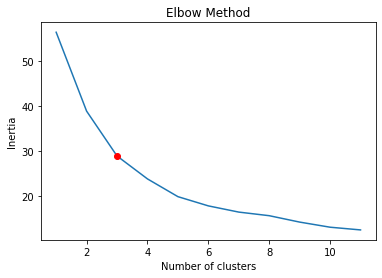

In [20]:
#Elbow Method
seed = 0
elbow = dict()
for k in range(1,12):
    estimator = KMeans(n_clusters = k,random_state=seed)
    res = estimator.fit_predict(fifanorm)
    inertia = estimator.inertia_   # On récupère la variation expliquée
    elbow[k] = inertia
    
elbow_df = pd.Series(elbow)
ax = elbow_df.plot(title = 'Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.plot(3,elbow_df[3],'ro')

Nous voyons plusieurs "coudes" on pourrait choisir 2, 3 ou même 4, nous choisissons 3.

### <a name="sil">Silhouette</a>


En partitionnement de données (clustering), le coefficient de silhouette est une mesure de qualité d'une partition d'un ensemble de données en classification automatique1. Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation). Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. A l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points.



Le coefficient (ou score) de silhouette se définit d'abord sur un point $i$ dont le groupe est $k=C(i)$.
Il se base sur la distance moyenne du point à son groupe : $a(i)=\frac{1}{\vert I_k \vert-1} \sum_{j\in I_k, j\neq i} d(x^i,x^j)$ et la distance moyenne du point à son groupe voisin $b(i)=\min_{k'\neq k} \frac{1}{\vert I_{k'} \vert} \sum_{i'\in I_{k'}} d(x^i,x^{i'})$.

Le coefficient de silhouette du point $i$ s'écrit alors :

$$
s_{sil}(i)=\frac{b(i)-a(i)}{\max(a(i),b(i))}
$$

On peut le moyenner groupe par groupe pour comparer leurs homogénéités : ceux avec les coefficient de silhouette les plus forts sont les plus homogènes.
Sur l'ensemble de la classification, il aura pour expression: $$
S_{sil}=\frac{1}{K}\sum_{k=1}^K \frac{1}{\vert I_k \vert}\sum_{i\in I_k} s_{sil}(i)$$


Utilisons le code [suivant](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py) fournie par scikit learn afin de trouver nos coefficients de silhouette pour **k** de 2 à 10 , on retiendra le **k** avec le plus grand coefficient.

For n_clusters = 2 The average silhouette_score is : 0.2806245754308943
For n_clusters = 3 The average silhouette_score is : 0.339094340649143
For n_clusters = 4 The average silhouette_score is : 0.2905080253634045
For n_clusters = 5 The average silhouette_score is : 0.2821386476050046
For n_clusters = 6 The average silhouette_score is : 0.27406692836092716
For n_clusters = 7 The average silhouette_score is : 0.266542128931488
For n_clusters = 8 The average silhouette_score is : 0.2553173883530559
For n_clusters = 9 The average silhouette_score is : 0.25948697892476325
For n_clusters = 10 The average silhouette_score is : 0.250226657142909


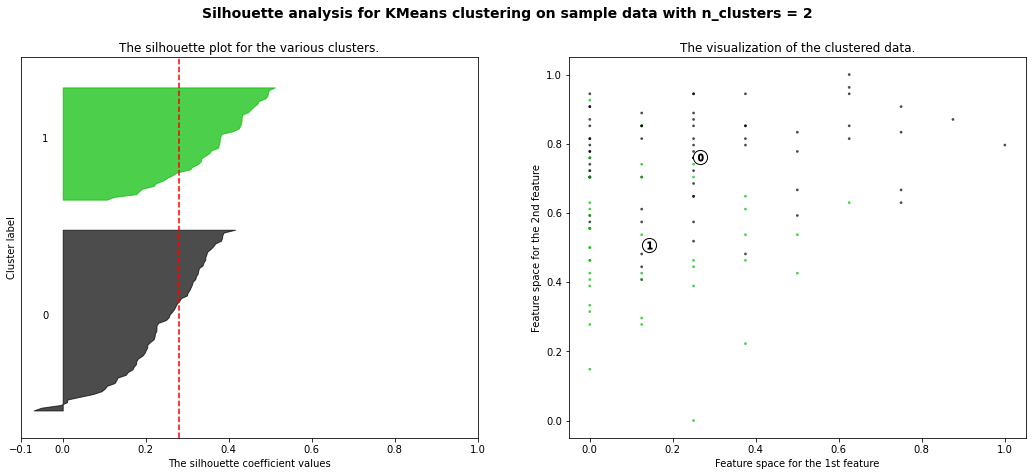

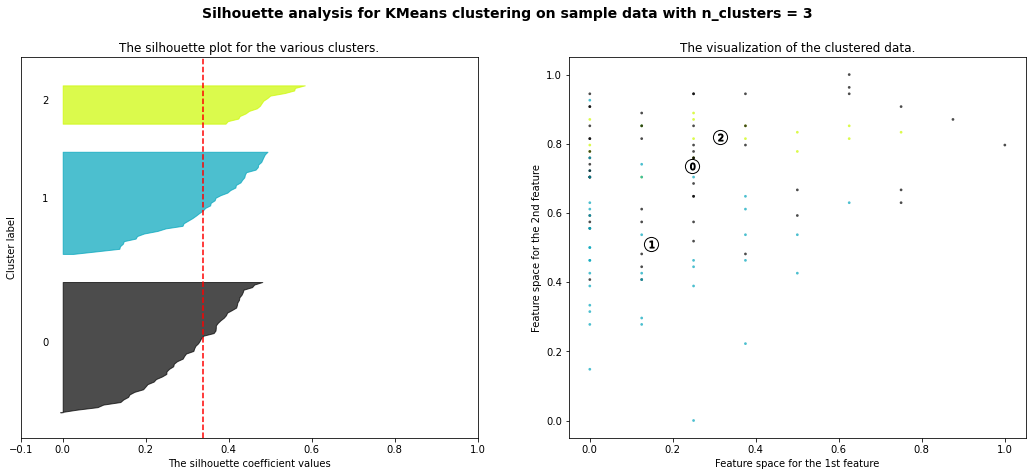

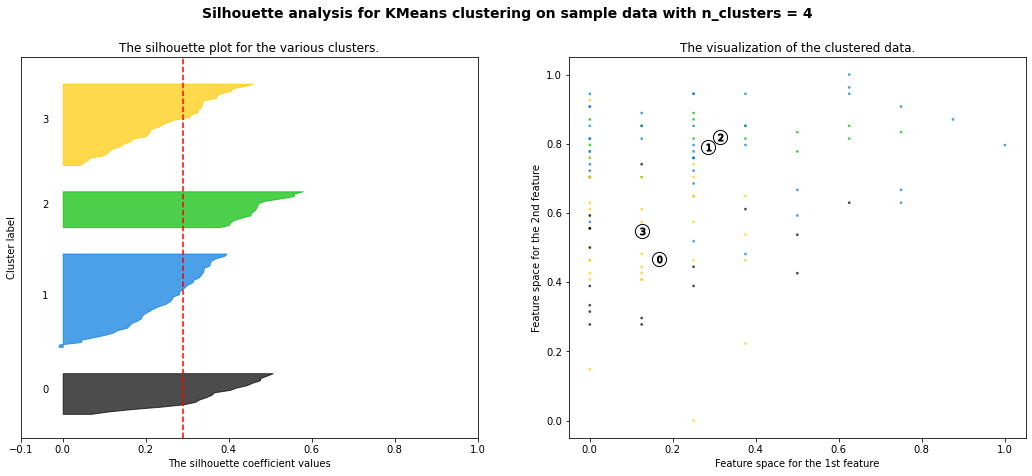

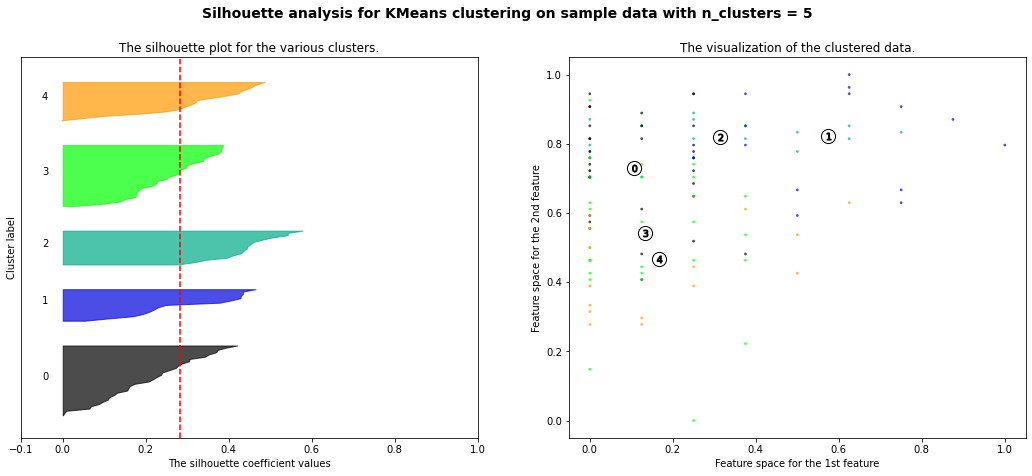

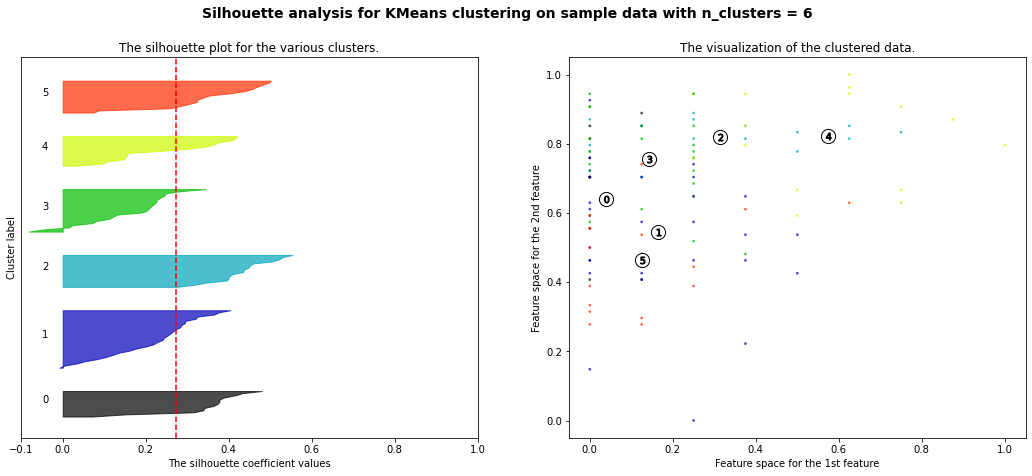

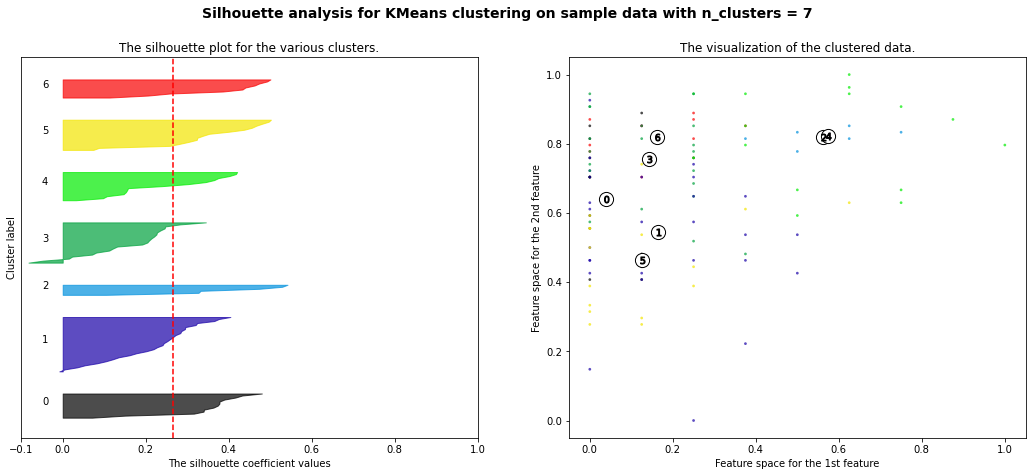

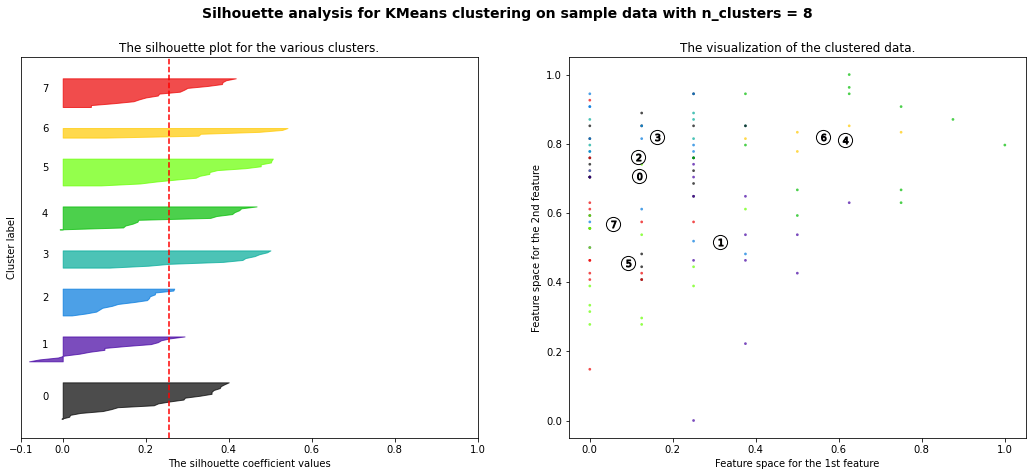

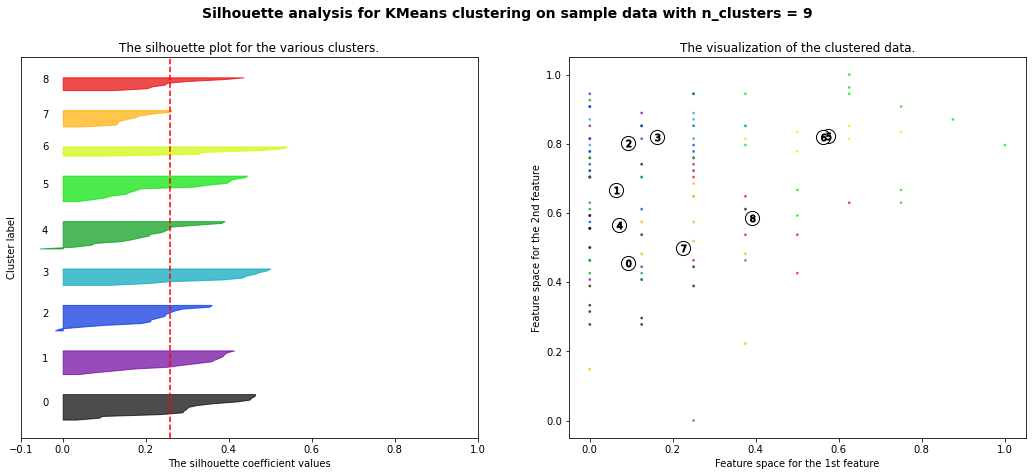

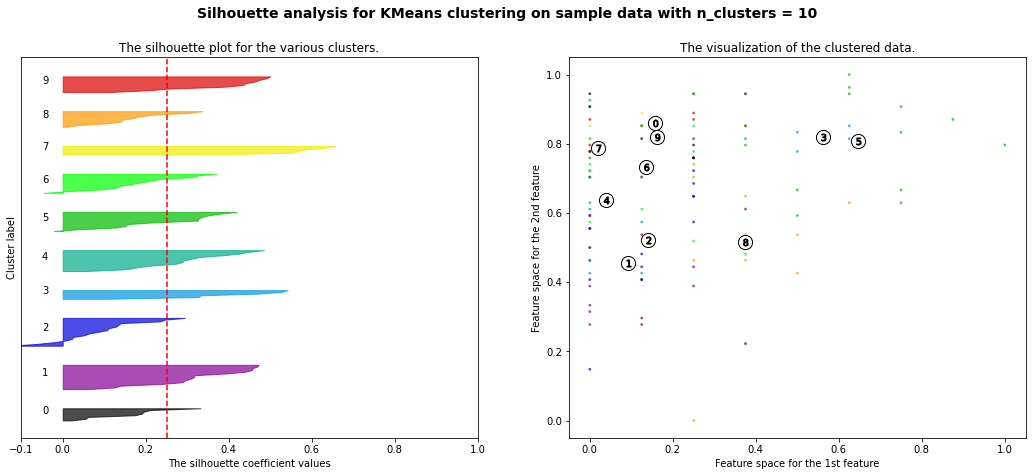

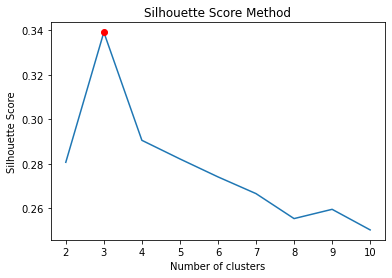

In [21]:
X = fifanorm.values
dict_silhouette_avg = dict()
range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    dict_silhouette_avg[n_clusters] = silhouette_avg

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

silhouette_df = pd.Series(dict_silhouette_avg)
ax = silhouette_df.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(3,silhouette_df[3],'ro')

**D'après le graphique ci dessus nous choisisons k=3 ce qui est cohérent avec la méthode du coude.**

## <a name="cak">Clustering avec Kmeans</a>




In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state=seed)
res = kmeans.fit_predict(fifanorm)

label_pred_kmeans = kmeans.labels_
print("Les labels (étiquette des groupes) prédits par K-Means:",label_pred_kmeans)
print('La longueur des étiquettes est identique à celle des données', label_pred_kmeans.shape)

centroids_kmeans= kmeans.cluster_centers_
print("taille de centroids_KM",centroids_kmeans.shape)
print("Centroïde:",centroids_kmeans)

inertia_kmeans = kmeans.inertia_
print("Inertie:",inertia_kmeans)
clusters = kmeans.labels_.tolist()

Les labels (étiquette des groupes) prédits par K-Means: [2 0 0 1 1 0 1 0 1 0 2 1 1 0 2 2 0 0 0 0 0 0 0 1 2 1 0 1 1 1 1 0 1 0 1 0 1
 2 2 0 1 0 0 1 1 1 1 0 0 0 1 2 0 2 0 2 0 2 2 1 0 0 0 0 1 0 1 2 1 0 1 0 0 0
 0 1 0 1 0 1 0 0 0 0 1 1 2 0 0 0 1 1 2 1 1 0 1 0 1 1 2 1 0 0 1 1 0 1 0]
La longueur des étiquettes est identique à celle des données (109,)
taille de centroids_KM (3, 9)
Centroïde: [[0.25       0.74291939 0.84464555 0.67370538 0.74733894 0.23496178
  0.53267974 0.31960784 0.86514829]
 [0.14285714 0.50793651 0.51135531 0.55921856 0.45170068 0.86077482
  0.71279762 0.23571429 0.72317283]
 [0.3125     0.81944444 0.87403846 0.63621795 0.80178571 0.36016949
  0.88020833 0.3875     0.05153203]]
Inertie: 28.8744838713924


Visualisons nos clusters sur les paires de nos variables.

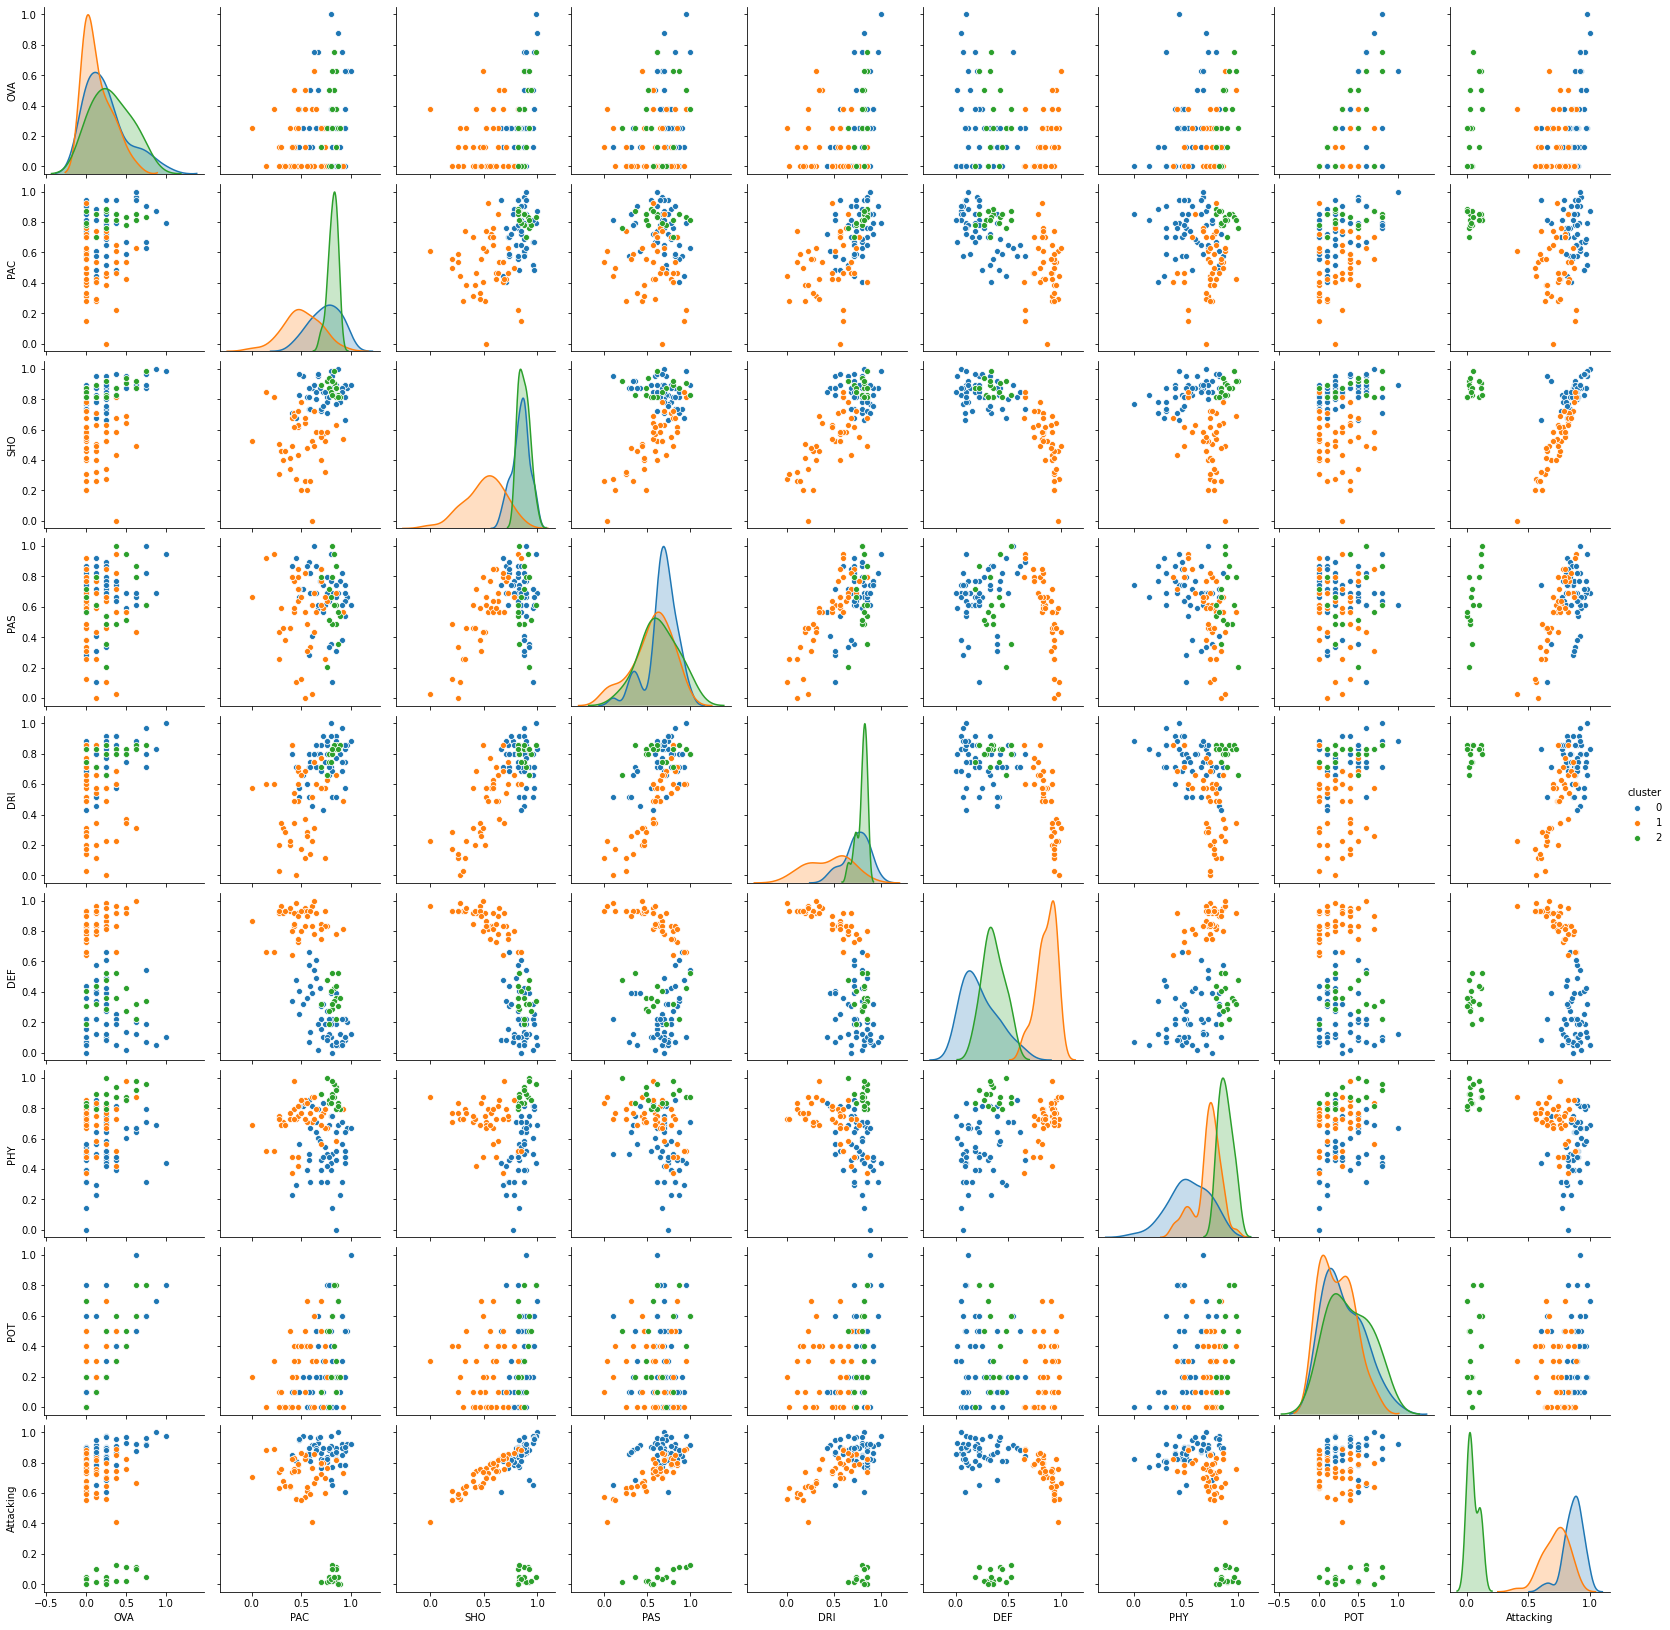

In [23]:
# Pairplot
fifanorm['cluster'] = label_pred_kmeans.astype(str)
sns_plot = sns.pairplot(fifanorm, hue = "cluster")

# <a name="3">Mélange Gaussien</a>

## <a name="pre2"> Présentation </a>

Le problème classique de la classification automatique est de considérer qu'un échantillon de données provienne d'un nombre de groupes inconnus a priori qu'il faut retrouver. Lorsqu'on part du postulat que ces groupes suivent une loi de probabilité (quelconque), alors on se place nécessairement dans le cadre des modèles de mélanges. Si en plus, on considère que les lois que suivent les individus sont normales, alors on se place dans le cadre des modèles de mélanges gaussiens.

Par la suite, on notera $x$, un échantillon composé de n individus $\left(\boldsymbol{x}_1,\dots,\boldsymbol{x}_n\right)$ appartenant à $\mathbb{R}^p$ (i.e. caractérisés par p variables continues). Dans le cadre des **modèles de mélanges**, on considère que ces individus appartiennent chacun à un des g (g étant fixé a priori) $G_1,\dots,G_g $suivant chacun une loi normale de moyenne $\boldsymbol{\mu}_k\, \left(k=1,\dots,g\right)$ et de matrice de variance-covariance $\boldsymbol{\Sigma}_k$. D'autre part, en notant $\pi_1,\dots,\pi_g$ les proportions des différents groupes, $\boldsymbol{\theta}_k=\left(\boldsymbol{\mu_k},\boldsymbol{\Sigma_k}\right)$ le paramètre de chaque loi normale et $\boldsymbol{\Phi}=\left(\pi_1,\dots,\pi_g,\boldsymbol{\theta}_1,\dots,\boldsymbol{\theta}_g\right)$ le paramètre global du mélange, la loi mélange que suit l'échantillon peut s'écrire

$$g(\boldsymbol{x},\boldsymbol{\Phi})=\sum_{k=1}^g\pi_kf(\boldsymbol{x},\boldsymbol{\theta}_k)$$,
avec $f(\boldsymbol{x},\boldsymbol{\theta}_k)$, la loi normale multidimensionnelle paramétrée par $\boldsymbol{\theta}_k$.

La principale difficulté de cette approche consiste à déterminer le meilleur paramètre $\boldsymbol{\Phi}$. Pour cela, on cherche habituellement le paramètre qui maximise la vraisemblance, donnée dans ce cas, par

$$L\left(\mathbf{x};\boldsymbol{\Phi}\right)=\sum_{i=1}^n\log\left(\sum_{k=1}^g\pi_kf(\boldsymbol{x}_i,\boldsymbol{\theta}_k)\right)$$.

Bien que ce problème puisse sembler particulièrement hardu, l'[algorithme EM](https://fr.wikipedia.org/wiki/Algorithme_esp%C3%A9rance-maximisation) permet de lever cette difficulté.

Une fois l'estimation effectuée, il s'agit d'attribuer à chaque individu la classe à laquelle il appartient le plus probablement. Pour cela, on utilise la règle d'inversion de Bayes. D'après celle-ci, on a

$$P\left(\boldsymbol{x}\in G_k\right)=\frac{P\left(\boldsymbol{x}|\boldsymbol{x}\in G_k\right).P\left(\boldsymbol{x}\in G_k\right)}{P(x)}$$.

ce qui se traduit, dans notre cas, par

$$P\left(\boldsymbol{x}_i\in G_k\right)=\frac{\pi_kf\left(\boldsymbol{x}_i,\boldsymbol{\theta}_k\right)}{\sum_{\ell=1}^g\pi_\ell f\left(\boldsymbol{x}_i,\boldsymbol{\theta}_\ell\right)}$$.

Il suffit alors d'attribuer chaque individu $\boldsymbol{x}_i $à la classe pour laquelle la probabilité a posteriori $P\left(\boldsymbol{x}_i\in G_k\right)$ est la plus grande.

## <a name="cab"> Critère AIC et BIC </a>


Tout comme le K-means, GMM exige de l'utilisateur qu'il spécifie le nombre clusters avant de former le modèle. Ici, nous pouvons utiliser le critère d'information Aikaki (AIC) ou le critère d'information Bayesien (BIC) pour nous aider dans cette décision. Soit $L$ la valeur maximale de la fonction de vraisemblance pour le modèle, $p$ le nombre de paramètres estimés dans le modèle et $N$ le nombre total de points (features) de données.

La valeur AIC du modèle est alors la suivante :

$$ \mathrm {AIC} =2 \cdot p - 2 \cdot \ln(L) $$
Et la valeur BIC est désignée par :

$$ \mathrm{BIC} = {-2 \cdot \ln(L) + p \cdot \ln(N)}$$
Pour les deux critères d'évaluation, le plus petit est le meilleur.

On utilisera: 

- .aic(X) : valeur du critère d’information de Akaike sur les données de X pour le modèle courant.

- .bic(X) : valeur du critère d’information de Bayes sur les données de X pour le modèle courant.

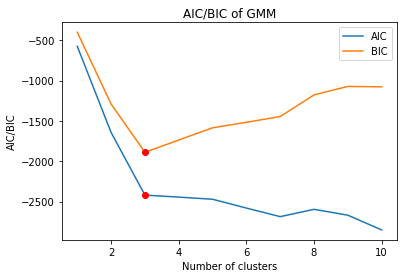

In [24]:
aic = dict()
bic = dict()
for k in range(1,11):
    estimator = GaussianMixture(n_components = k, random_state=seed)
    res = estimator.fit(fifanorm)
    ic1 = estimator.aic(fifanorm)
    ic2 = estimator.bic(fifanorm)
    aic[k] = ic1
    bic[k] = ic2
    
aic_df = pd.Series(aic)
bic_df = pd.Series(bic)

temp = {'AIC' : aic_df,
     'BIC' : bic_df}
ic_df = pd.DataFrame(temp)
ax = ic_df.plot(title='AIC/BIC of GMM')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('AIC/BIC')
plt.plot(3,aic_df[3],'ro')
plt.plot(3,bic_df[3],'ro')

In [25]:
nb_clust =pd.DataFrame([i for i in range(1,11)],
                      columns=['nb _cluster'])

aic_bic =pd.DataFrame([aic_df[i]+bic_df[i] for i in range(1,11)],
                      columns=['Aic + Bic'])

df=pd.concat([nb_clust, aic_bic.reindex(nb_clust.index)], axis=1).sort_values('Aic + Bic',ascending=False)
df

print(df.to_string(index=False))

 nb _cluster    Aic + Bic
           1  -976.390569
           2 -2934.823050
           9 -3740.767741
           8 -3772.899147
          10 -3928.200520
           5 -4056.121924
           6 -4096.936925
           7 -4132.226900
           4 -4180.966527
           3 -4308.740833


D'après la figure et le tableau ci-dessus, nous pouvons voir qu'en considérant à la fois les valeurs minimales de l'AIC et du BIC, **le nombre de clusters devrait être de 3!**.

## <a name="cmg">Clustering avec les Mélanges Gaussiens</a>


In [26]:
GMM = GaussianMixture(n_components = 3, random_state=seed)
res_GMM = GMM.fit(fifanorm)

weights_GMM = GMM.weights_
print("Poids:",weights_GMM)
means_GMM = GMM.means_
print("Moyennes:",means_GMM)
covariance_GMM = GMM.covariances_
print("Type de covariance_GMM:",type(covariance_GMM))
covariance_GMM.size

label_pred_GMM = GMM.predict(fifanorm)
print("Label prédit par GMM:",label_pred_GMM)
print('La longueur des étiquettes est identique à celle des données', label_pred_GMM.shape)

Poids: [0.46788991 0.14678899 0.3853211 ]
Moyennes: [[0.25       0.74291939 0.84464555 0.67370538 0.74733894 0.23496178
  0.53267974 0.31960784 0.86514829 0.        ]
 [0.3125     0.81944444 0.87403846 0.63621795 0.80178571 0.36016949
  0.88020833 0.3875     0.05153203 2.        ]
 [0.14285714 0.50793651 0.51135531 0.55921856 0.45170068 0.86077482
  0.71279762 0.23571429 0.72317283 1.        ]]
Type de covariance_GMM: <class 'numpy.ndarray'>
Label prédit par GMM: [1 0 0 2 2 0 2 0 2 0 1 2 2 0 1 1 0 0 0 0 0 0 0 2 1 2 0 2 2 2 2 0 2 0 2 0 2
 1 1 0 2 0 0 2 2 2 2 0 0 0 2 1 0 1 0 1 0 1 1 2 0 0 0 0 2 0 2 1 2 0 2 0 0 0
 0 2 0 2 0 2 0 0 0 0 2 2 1 0 0 0 2 2 1 2 2 0 2 0 2 2 1 2 0 0 2 2 0 2 0]
La longueur des étiquettes est identique à celle des données (109,)


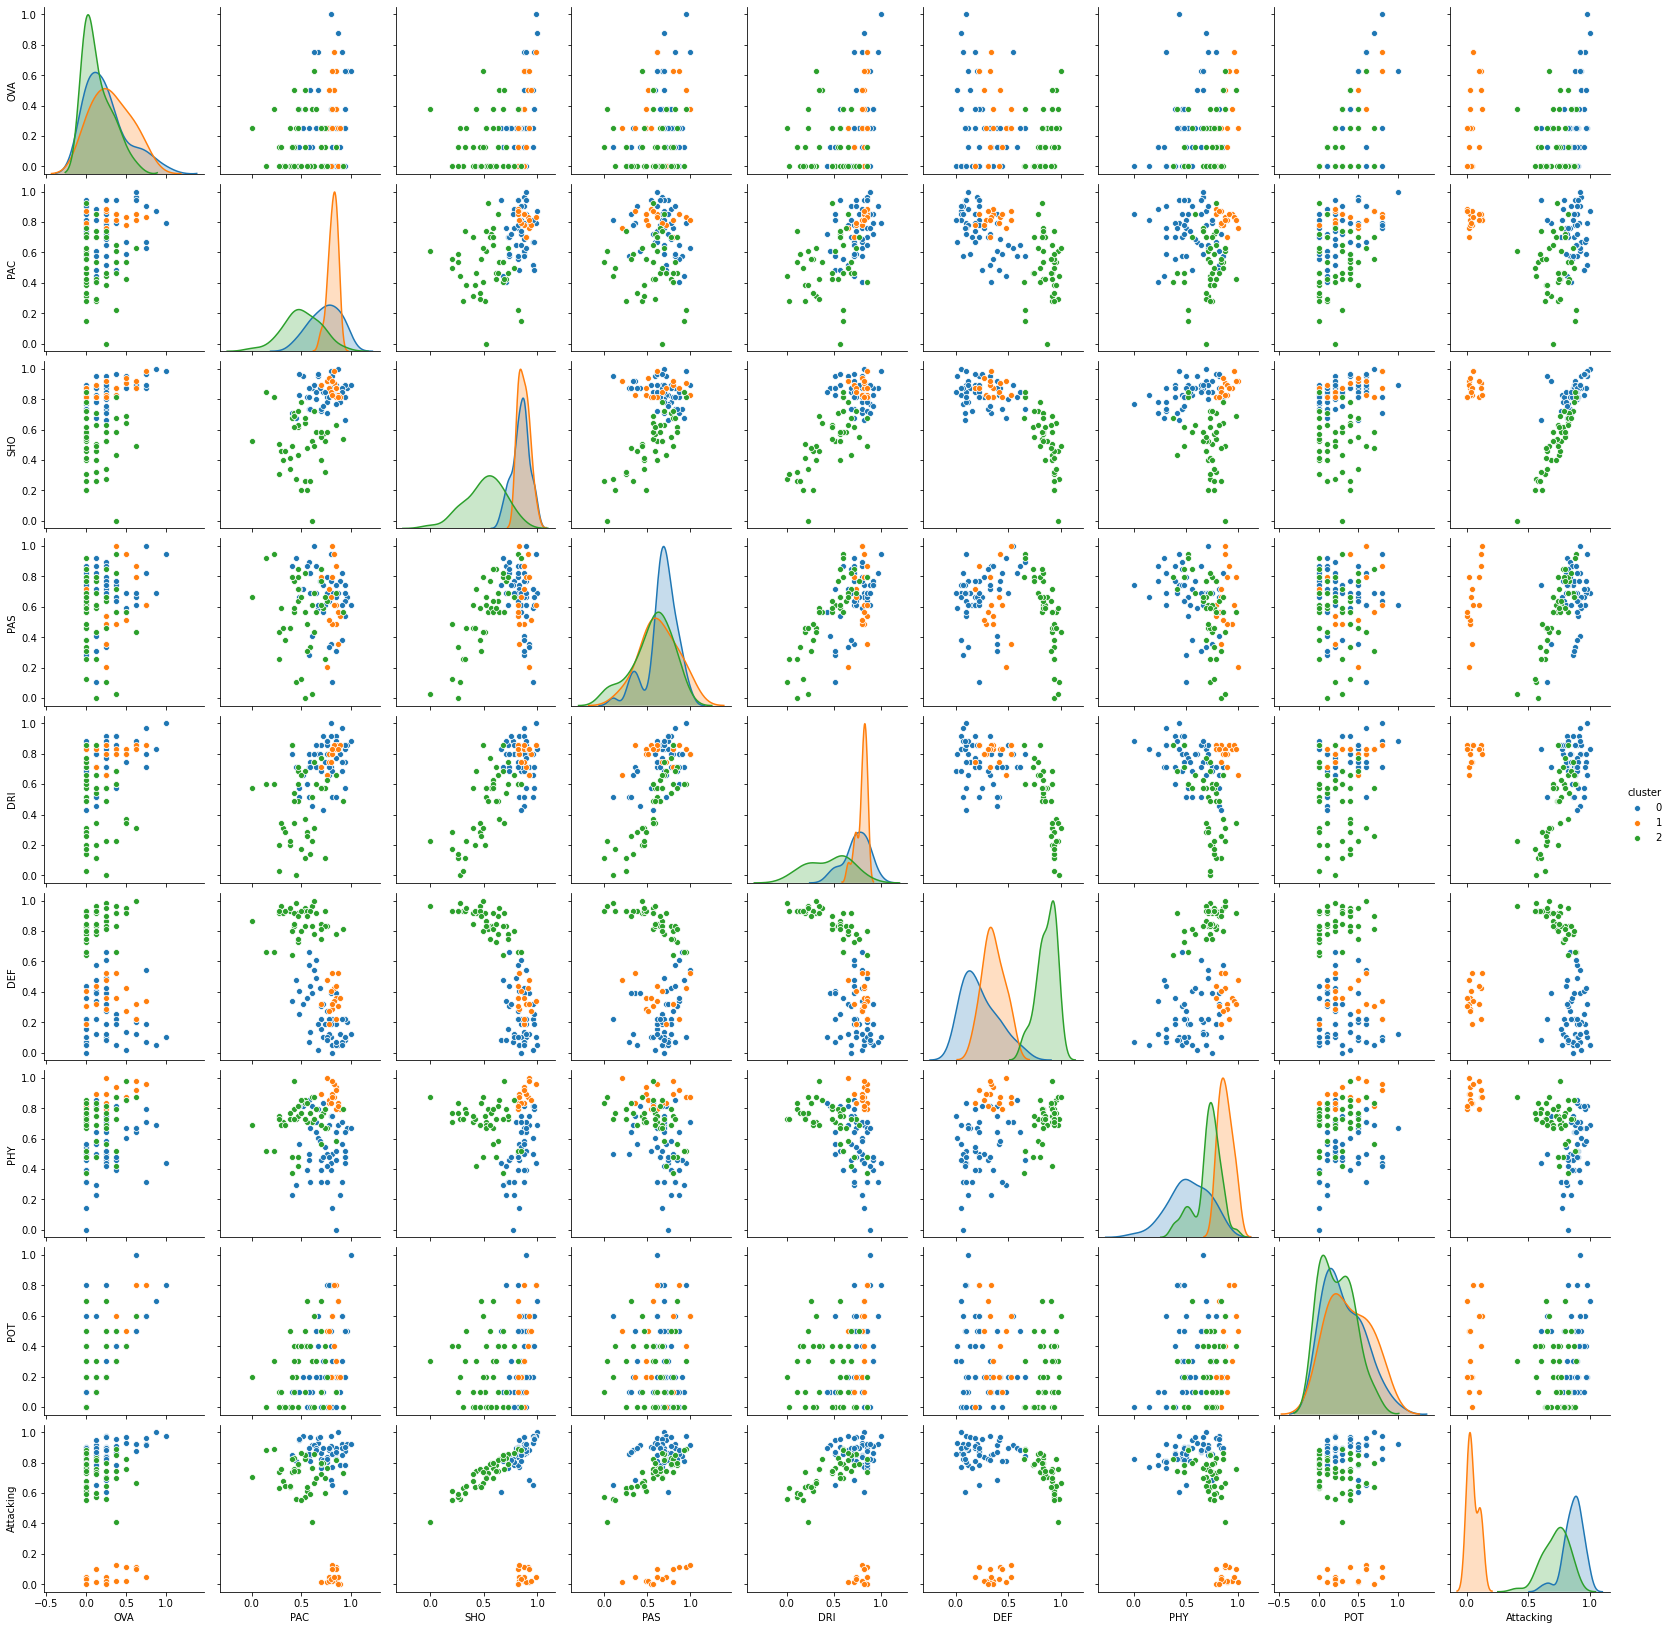

In [27]:
fifanorm['cluster'] = label_pred_GMM.astype(str)
sns_plot = sns.pairplot(fifanorm, hue = "cluster")

# <a name="4">Classification Hiérarchique</a>

## <a name="pre3"> Présentation </a>

Le clustering hiérarchique permet de partitionner un jeu de données de manière hiérarchique.

Dans le cas du clustering agglomératif (ou bottom-up, **Classification ascendante hiérarchique**), on commence par considérer que chaque point (nos joueurs ici) est un cluster à lui tout seul. Ensuite, on trouve les deux clusters les plus proches, et on les agglomère en un seul cluster. On répète cette étape jusqu'à ce que tous les points appartiennent à un seul cluster, constitué de l'agglomération de tous les clusters initiaux.

L'approche inverse, le clustering divisif (ou top-down **Classification descendante hiérarchique**), consiste à initialiser avec un unique cluster contenant tous  les points, puis à itérativement séparer chaque cluster en plusieurs, jusqu'à ce que chaque point appartiennent à son propre cluster.

À chaque étape, on agrège les deux clusters les plus proches

La distance entre clusters peut être calculée de la façon suivante :

- Lien simple (single linkage) : la distance entre deux clusters est celle entre les deux points les plus proches.

- Lien complet (complete linkage): la distance entre deux clusters est celle entre les deux points les plus éloignés.

- Lien centroïdal (centroid linkage) : la distance entre deux clusters est celle entre les deux centroïdes.

- Lien moyen (Unweighted Paired Group Method with Arithmetic mean): la distance entre deux clusters est la distance moyenne entre les points des deux clusters.

- Clustering de Ward : la distance entre deux clusters est calculée de façon à minimiser la variance inter-cluster.

On peut visualiser une partition hiérarchique des données avec un dendrogramme.

Le clustering hiérarchique est implémenté dans le module cluster de scikit-learn.

- Avantages du clustering hiérarchique
Le clustering hiérarchique a l'avantage qu'il n'est pas nécessaire de définir le nombre de clusters à l'avance (on explore toutes les possibilités). Cependant, cela ne fait que repousser cette décision. Celle-ci peut se faire sur la base d'un dendrogramme (cela suppose de pouvoir bien visualiser le dendrogramme, ce qui sera plus aisé sur un petit jeu de données). On peut aussi évaluer les différentes partitions trouvées (une pour chaque valeur possible de nombre de clusters) avec une mesure telle que le coefficient de silhouette ou l'indice de Davies-Bouldin.

- Inconvénients: Par contre, sa complexité algorithmique est lourde. À chaque itération, pour décider quels clusters joindre, nous aurons besoin des distances deux à deux entre toutes les paires de points du jeu de données. Les calculer a un coût quadratique en temps de calcul ; les stocker, un coût quadratique en espace mémoire. Pour cette raison, le clustering hiérarchique est plus adapté aux échantillons contenant un faible nombre d'individus.

## <a name="den"> Dendogramme </a>

Traçons le dendogramme avec scipy.

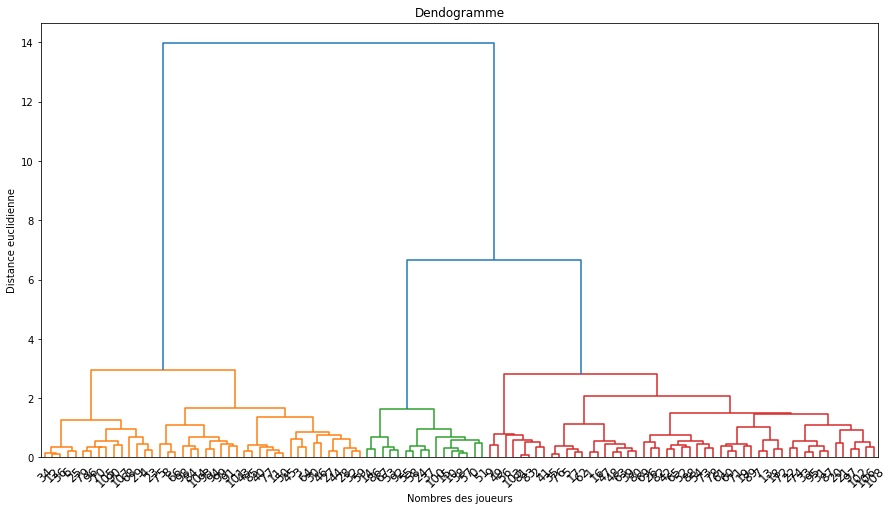

In [28]:

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 8))
dendogram= sch.dendrogram(sch.linkage(fifanorm,method='ward'), color_threshold=3, leaf_font_size=12, leaf_rotation=45)
plt.title('Dendogramme')
plt.xlabel('Nombres des joueurs')
plt.ylabel('Distance euclidienne')
plt.plot()
plt.show()

Pour déterminer le nombre de cluster nous prouvons éxaminer le dendogrammeen regardant la ligne verticale la plus longue, il s'agit de la ligne bleu tout à droite qui se sépare lorque la distance euclidienne vaut 3, on trace alors une ligne horizontale à partir de 4 par exemple . On coupe alors 3 droites verticales la première en bleu et deux en rouges on en déduit que le nombre de cluster est le nombre de lignes verticales coupé donc 3.


Le clustering hiérarchique est implémenté dans le module [cluster](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) de scikit-learn cependant nous nous arretons ici pour cette partie.

# <a name="5">ACP</a>


## <a name="pre4"> Présentation </a>

L'Analyse en Composantes Principales (PCA en anglais) est une méthode de la famille de l'analyse des données et plus généralement de la statistique multivariée, qui consiste à transformer des variables liées entre elles (dites **corrélées** en statistique) en nouvelles variables indépendantes les unes des autres (donc **non corrélées**). Ces nouvelles variables sont nommées **composantes principales**, ou axes. Elle permet au praticien de réduire l'information en un nombre de composantes plus limité que le nombre initial de variables.


L’analyse en composante principale pour des données numériques en n dimensions est un algorithme non supervisé d’identification des dimensions de variance décroissante et de changement de base pour ne conserver que les k dimensions de plus grande variance.

Il consiste à :

- 0: Optionnel : Normaliser les données (important si les données n’ont par exemple pas été mesurées aux mêmes échelles)

- 1: Construire la matrice de covariance entre les variables : $\Sigma = \frac{1}{n-1}\sum_{i=1}^{n}{((X - \bar{x})'(X - \bar{x}))}$

- 2: Trouver les valeurs propres $\lambda_i$ et vecteurs propres $v_i : \Sigma v_i = \lambda_iv_i$, ces vecteurs propres forment un repère orthogonal de l’espace des données (en tant que vecteurs propres d’une matrice symmétrique qu’on supposera de rang n)

- 3: Classer les valeurs propres (et les vecteurs associés) de façon décroissante : $\{\lambda_{(n)}, \lambda_{(n-1)}...\lambda_{(1)} \}$ où $\lambda_{(i)}$ est la i-ème variance dans l’ordre croissant

- 4: Ne conserver que les $k, (k \leqslant n)$ premiers vecteurs : $\{v_{(n)}, v_{(n-1)}...v_{(n-k+1)} \}$

- 5: Construire la matrice de projection dans l’espace de ces vecteurs (changement de base si n=k)

- 6: Projeter les données initiales dans cet espace de dimension k

## <a name="amuce"> Appliquer les modèles en utilisant les caractéristiques extraites de l'ACP </a>

In [29]:
from sklearn.decomposition import PCA
pca = PCA(random_state=seed)
fifanorm_acp_array = pca.fit_transform(fifanorm)
fifanorm_acp = pd.DataFrame(fifanorm_acp_array)
print("Head de fifanorm_acp:\n",fifanorm_acp.head())
var_ratio = pca.explained_variance_ratio_
print("Rapport de variance expliqué:",var_ratio)
sv = pca.singular_values_
print("Valeur singulière :",sv)

Head de fifanorm_acp:
           0         1         2         3         4         5         6  \
0  0.118595  0.688835 -0.511960  0.168117  0.096095 -0.050672  0.060398   
1 -0.867496 -0.468657  0.044183 -0.169571  0.171776  0.376948  0.054198   
2 -1.139730  0.386358  0.536865  0.272413  0.009656 -0.165958 -0.208189   
3  1.134193 -0.078193  0.377603 -0.144770 -0.100804  0.255785 -0.164353   
4  1.370959 -0.150920 -0.263527  0.565254  0.040685  0.169741 -0.196028   

          7         8         9  
0  0.101143  0.203494 -0.065625  
1 -0.028118 -0.006124 -0.030357  
2  0.058699 -0.064059  0.021573  
3  0.010147  0.094450  0.000053  
4  0.057922 -0.054568 -0.071681  
Rapport de variance expliqué: [0.73868903 0.08981936 0.05662312 0.04828584 0.02154166 0.01421656
 0.01283319 0.01003096 0.00489938 0.0030609 ]
Valeur singulière : [10.47750449  3.65352444  2.90084093  2.67877927  1.78923202  1.45353096
  1.38100191  1.22095134  0.85329213  0.67445267]


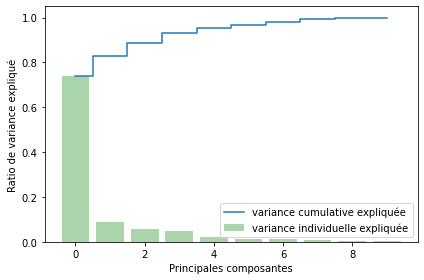

Variance expliquée:  [0.73868903 0.08981936 0.05662312 0.04828584 0.02154166 0.01421656
 0.01283319 0.01003096 0.00489938 0.0030609 ]
Ratio cumulatif expliqué: [0.73868903 0.82850839 0.8851315  0.93341734 0.95495901 0.96917557
 0.98200875 0.99203972 0.9969391  1.        ]


In [30]:
cum_var_ratio = np.cumsum(var_ratio)
plt.bar(range(len(var_ratio)), 
        var_ratio, 
        alpha=0.3333, 
        align='center', 
        label='variance individuelle expliquée', 
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio, 
         where='mid',
         label='variance cumulative expliquée')
plt.ylabel('Ratio de variance expliqué')
plt.xlabel('Principales composantes')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()
print('Variance expliquée: ', var_ratio)
print("Ratio cumulatif expliqué:",cum_var_ratio)

Le graphique ci-dessus montre clairement qu'une partie de la variance (73,86% de la variance pour être précis) peut être expliquée par la première composante principale seule. La deuxième composante principale contient encore quelques informations (8,98%) etc.... Ensemble, les deux premières composantes principales expliquent 82,85% de la variance. En d'autres termes, elles contiennent 82,85% des informations. (En générale 95 % ou 99 % sont des seuils communs que les gens utilisent ici on pourrait prendre nos 5 premières composantes avec 95,49%).

Pour faciliter la visualisation des clusters notamment, **nous choisissons les deux premiers composantes principales** dans cette partie à noter que généralement ont choisis 95% ou 97% de la variance comme dit précedemment, traçons le nuage de points avec les étiquettes colorées prévues par la méthode K-Mean et la méthode GMM.

On utilisera les fonctions **plot_kmeans**, **plot_gmm** et **draw_ellipse** pour représenter nos clusters.

In [31]:
def plot_kmeans(kmeans, X, n_clusters, rseed=2, ax=None):
    dot_size = 50
    cmap = 'viridis'
    labels = kmeans.fit_predict(X)
    
    # plot input data
    #ax = ax or plt.gca() # <-- nice trick
    fig, ax = plt.subplots(figsize=(9,7))    
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1],
               c=labels, s=dot_size, cmap=cmap, zorder=2)
    
    # plot the representation of Kmeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i], [center]).max() 
             for i, center in enumerate(centers)]
    
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC',edgecolor='slategrey',
                                lw=4, alpha=0.5, zorder=1))
    return  

In [32]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
        
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, 
                            angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    dot_size = 50
    cmap = 'viridis'
    
    fig, ax = plt.subplots(figsize=(9,7))      
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=dot_size, cmap=cmap, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=dot_size, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, ax=ax, alpha=w * w_factor)

Nous allons utilisé K-Means et les Mélanges gaussiens(GMM).

Text(0.5, 1.0, 'Clusters de GMM dans deux PCs')

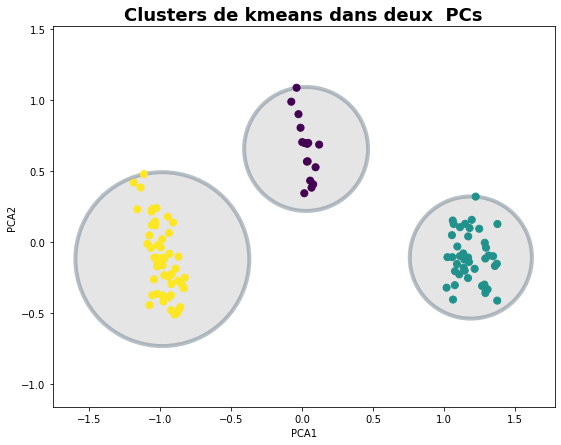

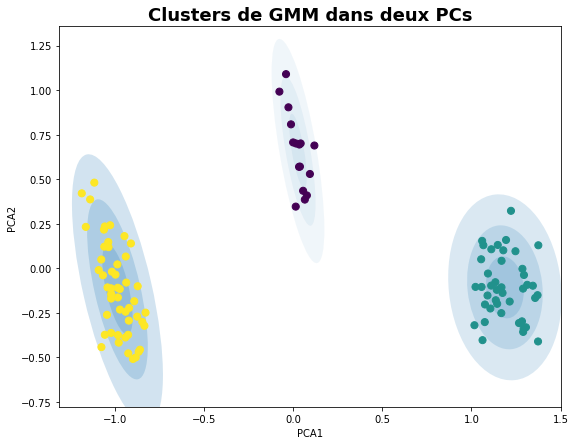

In [33]:
fifanorm_acp_array = pca.fit_transform(fifanorm)
fifanorm_acp = pd.DataFrame(fifanorm_acp_array)
pca = PCA(n_components=2, random_state=seed)
fifanorm_acp_array = pca.fit_transform(fifanorm)
fifanorm_acp = pd.DataFrame(fifanorm_acp_array)


# KM
KM = KMeans(n_clusters = 3, random_state=seed)
res_KM_PCA = KM.fit(fifanorm_acp)
label_pred_KM_PCA = KM.predict(fifanorm_acp)
plot_kmeans(KM, fifanorm_acp.values,n_clusters=3)
plt.ylabel('PCA2')
plt.xlabel('PCA1')
plt.title('Clusters de kmeans dans deux  PCs', fontsize=18, fontweight='demi')
clusters = KM.labels_.tolist()
# GMM
GMM = GaussianMixture(n_components = 3, random_state=seed)
res_GMM_PCA = GMM.fit(fifanorm_acp)
label_pred_GMM_PCA = GMM.predict(fifanorm_acp)
plot_gmm(GMM, fifanorm_acp.values)
plt.ylabel('PCA2') #principale composante2
plt.xlabel('PCA1')
plt.title('Clusters de GMM dans deux PCs', fontsize=18, fontweight='demi')

Au vue des graphiques suivant nous voyons bien que kmeans et GMM ont bien classé nos points ont obtient les mêmes résultats. Traçons nos cluster en coloriant en fonction des labels.

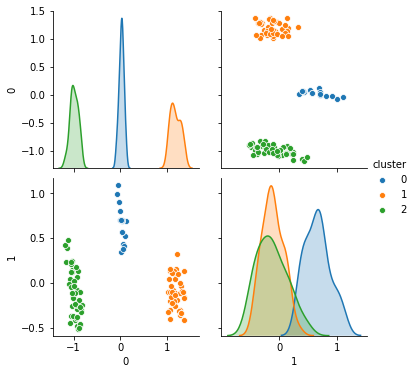

In [34]:
fifanorm_acp['cluster'] = label_pred_KM_PCA.astype(str)
sns_plot = sns.pairplot(fifanorm_acp, hue = "cluster")


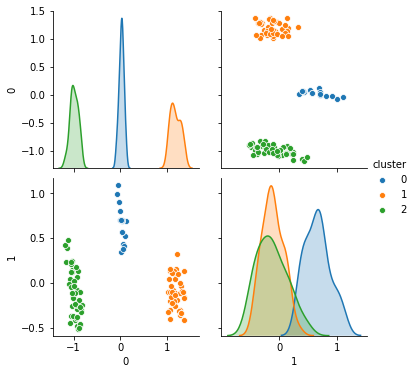

In [35]:
fifanorm_acp['cluster'] = label_pred_GMM_PCA.astype(str)
sns_plot = sns.pairplot(fifanorm_acp, hue = "cluster")

On peut visualiser nos clusters avec le noms des joueurs pour avoir une idée plus claire sur chacun d'entre eux.

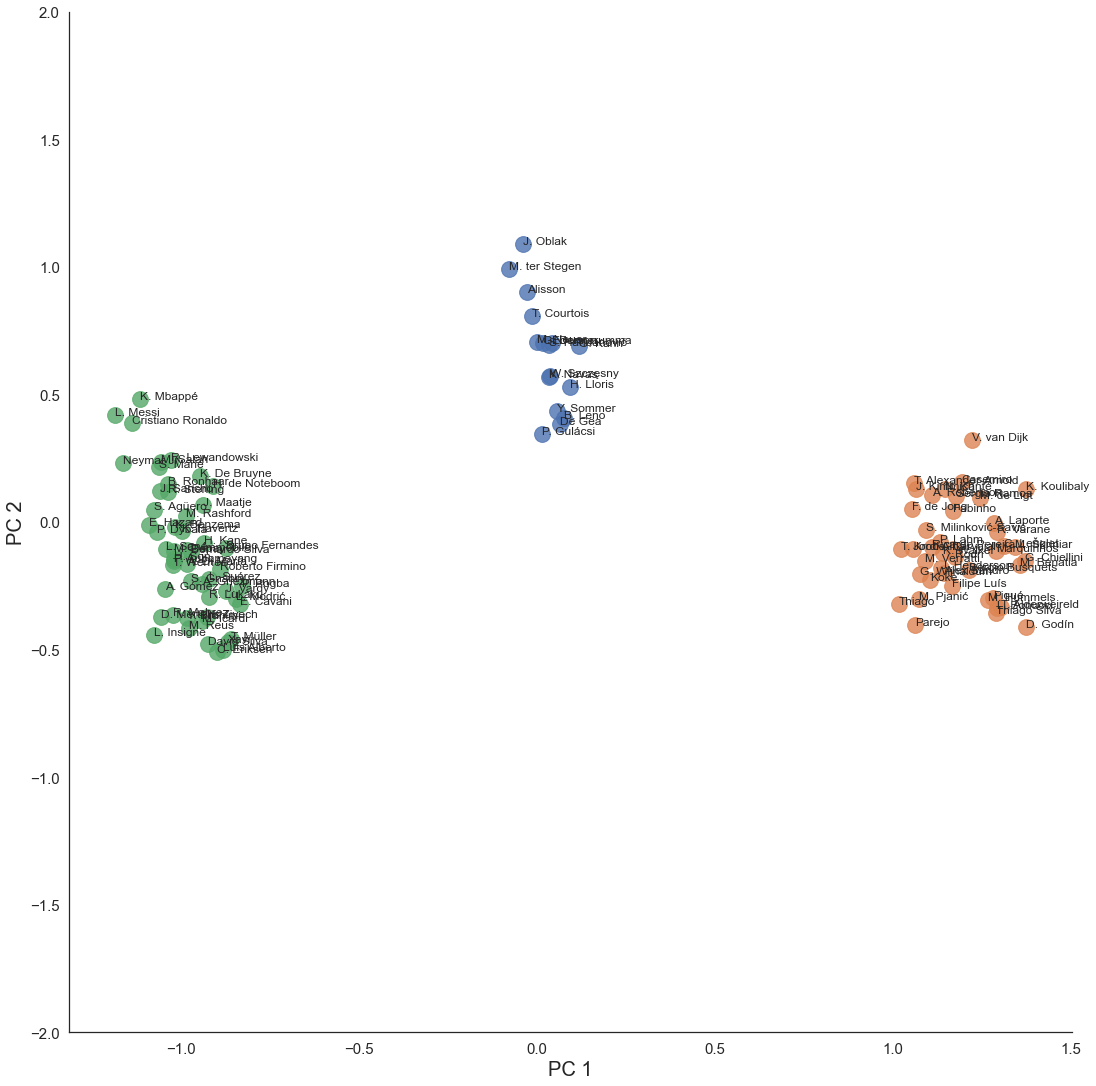

In [36]:
fifanorm1_acp=fifanorm_acp.copy()
fifanorm1_acp['cluster'] = clusters
fifanorm1_acp['Name'] = names
fifanorm1_acp.columns = ['x', 'y', 'cluster', 'name']
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = fifanorm1_acp, legend=False,
fit_reg=False, height = 15, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(fifanorm1_acp.x, fifanorm1_acp.y, fifanorm1_acp.name):
    texts.append(plt.text(x, y, s))
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)
plt.show()


# <a name="6">Conclusion</a>

Nous avons réussis à regrouper nos joueurs pour les connaisseurs de foot on pourrait voir que nos 3 groupes représentent: 
- les joueurs avec un profil offensif 
- les joueurs gardiens de but 
- les joueurs avec un profil défensif 

## <a name="ref">Références</a>

- [Python Data Science Handbook Gaussian Mixtures](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)

- [Wikipédia K-moyennes](https://fr.wikipedia.org/wiki/K-moyennes)

- [Wikipédia Silhouette](https://fr.wikipedia.org/wiki/Silhouette_(clustering))

- [Techno Science: Modèle de mélanges gaussiens](https://www.techno-science.net/definition/6349.html)

- [Xavier Dupre: Réduction de dimension](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/dimensions_reduction.html)

- [Ensa Tétouan: Algorithme K-Moyennes](http://www.ieee.ma/uaesb/pdf/Algo-k-Moyennes.pdf) 

- [Openclassroom:  Explorez vos données avec des algorithmes non supervisés ](https://openclassrooms.com/fr/courses/4379436-explorez-vos-donnees-avec-des-algorithmes-non-supervises/4379561-partitionnez-vos-donnees-avec-un-algorithme-de-clustering-hierarchique)

- [Towards Datascience: Grouping Soccer Players with Similar Skillsets in FIFA 20 Part 1: K-Means Clustering](https://towardsdatascience.com/grouping-soccer-players-with-similar-skillsets-in-fifa-20-part-1-k-means-clustering-c4a845db78bc)
